In [1]:
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np
import random
import sys

In [2]:
# generate random graph
def generateGraph(V,E):
    maxE = V * V-1
    if (E > maxE):
         print("Error")
         return
    adjMat = [[0]*V for i in range(V)]
    for _ in range(E):
        while (True):
            j,k = random.sample(range(V),2)
            if (adjMat[j][k] == 0):
                    adjMat[j][k] = random.randint(1,10)
                    break
    return adjMat

def printAdjMat(adjMat):
    for row in adjMat:
        for val in row:
            print(val, end=' ')
        print()

In [3]:
# dijkstra algo with lists

import sys
import time

queue_len = 0
queue = [None] * 10000

class PQItem:
    def __init__(self, node, priority):
        self.node = node
        self.priority = priority

def insert(node, priority):
    global queue_len
    item = PQItem(node, priority)
    queue[queue_len] = item
    queue_len += 1
    # binary search
    left, right = 0, queue_len-1
    while left < right:
        mid = (left + right) // 2
        if queue[mid].priority <= priority:
            right = mid
        else:
            left = mid + 1
    # insert the new item at the correct position
    for i in range(queue_len-1, left, -1):
        queue[i] = queue[i-1]
    queue[left] = item

def delete(node):
    global queue_len
    i = 0
    found = False
    while (i < queue_len):
        if queue[i].node == node:
            found = True
            queue_len -= 1
        if found and i < queue_len:
            queue[i] = queue[i+1]
        i += 1
    
def arrayDij(adjMat, src, V):
    dist = [sys.maxsize] * V
    S = [0] * V
    for i in range(V):
        dist[i] = sys.maxsize
        if (i == src):
            dist[i] = 0
        S[i] = 0
        insert(i, dist[i])
        
    while queue_len > 0:
        minNode = queue[0]
        S[minNode.node] = 1
        for i in range(V):
            if dist[minNode.node] != sys.maxsize and S[i] == 0 and adjMat[minNode.node][i] != 0 and (dist[minNode.node] + adjMat[minNode.node][i]) < dist[i]:
                dist[i] = dist[minNode.node] + adjMat[minNode.node][i]
                delete(i)
                insert(i, dist[i])
        delete(minNode.node)

def arrayDijRuntime(graph):
    global queue, queue_len
    queue = [None] * len(graph)
    queue_len = 0
    start = time.time()
    arrayDij(graph,0,len(graph))
    return time.time() - start

In [4]:
from heapq import *
import sys
import time

def convert_matrix_to_list(matrix):
    # Get the number of nodes in the graph
    num_nodes = len(matrix)
    
    # Initialize an empty dictionary to represent the graph
    graph = {}
    
    # Iterate over each row in the matrix
    for i in range(num_nodes):
        # Initialize an empty list to represent the neighbors of the current node
        neighbors = []
        
        # Iterate over each column in the matrix
        for j in range(num_nodes):
            # If the weight of the edge is non-zero, add the neighbor to the list
            if matrix[i][j] != 0:
                neighbors.append((j, matrix[i][j]))
        
        # Add the list of neighbors to the graph dictionary with the node as the key
        graph[i] = neighbors
    
    return graph


def heapDij(graph,src):
    dist = [sys.maxsize for node in graph]
    S = [0 for node in graph]
    dist[src] = 0
    heap = [(0,src)]
    heap_size = 1
    while heap_size > 0:
        currentDist , currentNode = heappop(heap)
        heap_size -= 1
        if (S[currentNode] == 1):
            continue
        S[currentNode] = 1
        for neighbor, weight in graph[currentNode]:
            distance = currentDist + weight
            if distance < dist[neighbor]:
                dist[neighbor] = distance
                heappush(heap, (distance, neighbor))
                heap_size += 1

def heapDijRunTime(graph):
    start = time.time()
    heapDij(graph,0)
    return time.time() - start

In [5]:
vertices = [10,100,500,1000,10000]
edges = [int(i*i/2) for i in vertices]
runtimesMat = []
runtimesList = []

for i in range(len(vertices)):
    graph = generateGraph(vertices[i],edges[i])
    adjList = convert_matrix_to_list(graph)
    runtimesMat.append(arrayDijRuntime(graph))
    runtimesList.append(heapDijRunTime(adjList))


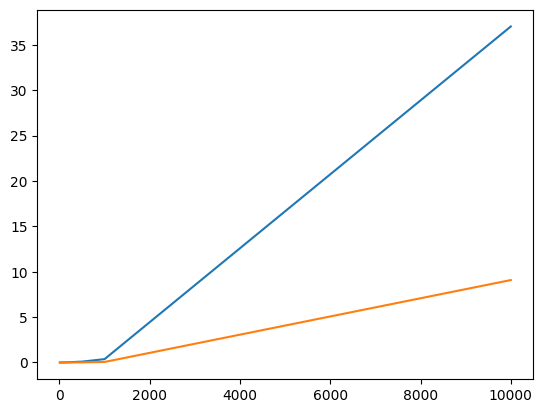

In [6]:
plt.plot(vertices,runtimesMat)
plt.plot(vertices,runtimesList)


In [7]:
vertices = range(1000,2500,50)
edges = [10000 for i in vertices]
runtimesMatV = []
runtimesListV = []

for i in range(len(vertices)):
    graph = generateGraph(vertices[i],edges[i])
    adjList = convert_matrix_to_list(graph)
    runtimesMatV.append(arrayDijRuntime(graph))
    runtimesListV.append(heapDijRunTime(adjList))


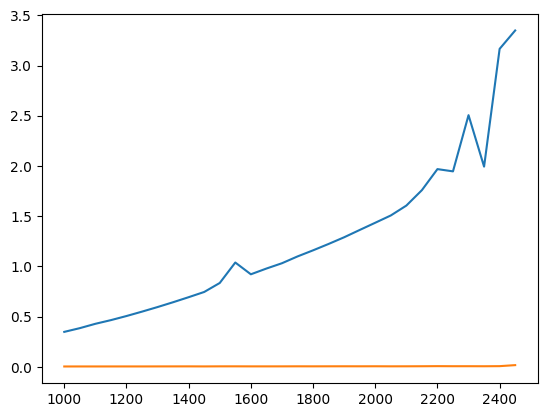

In [8]:
plt.plot(vertices,runtimesMatV)
plt.plot(vertices,runtimesListV)